# optimization methods 
in this notebook we implement some diffrent kind of optimization 
algorithm witch lead to faster and maybe better result  

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
def update_parameters_with_gd(param,grad,alpha):
    """
    update parameters of neural network and work with diffrent 
    optimization methods 

    arguments:
    param -- pervious parameters
    grad -- gradian from backpropagation 
    alpha -- learning rate

    returns:
    param -- updated parameters  
    """

    L = len(param) // 2 

    for l in range(1,L+1):

        param["W"+str(l)] -= alpha *  grad["dW"+str(l)]
        param["b"+str(l)] -= alpha *  grad["db"+str(l)]

    return param 


In [3]:
# importing test cases for testing function witch we create 
from testCases import *

In [4]:
parameters, grads, learning_rate = update_parameters_with_gd_test_case()

parameters = update_parameters_with_gd(parameters, grads, learning_rate)
print("W1 =\n" + str(parameters["W1"]))
print("b1 =\n" + str(parameters["b1"]))
print("W2 =\n" + str(parameters["W2"]))
print("b2 =\n" + str(parameters["b2"]))

W1 =
[[ 1.63535156 -0.62320365 -0.53718766]
 [-1.07799357  0.85639907 -2.29470142]]
b1 =
[[ 1.74604067]
 [-0.75184921]]
W2 =
[[ 0.32171798 -0.25467393  1.46902454]
 [-2.05617317 -0.31554548 -0.3756023 ]
 [ 1.1404819  -1.09976462 -0.1612551 ]]
b2 =
[[-0.88020257]
 [ 0.02561572]
 [ 0.57539477]]


**Expected Output**:

```
W1 =
[[ 1.63535156 -0.62320365 -0.53718766]
 [-1.07799357  0.85639907 -2.29470142]]
b1 =
[[ 1.74604067]
 [-0.75184921]]
W2 =
[[ 0.32171798 -0.25467393  1.46902454]
 [-2.05617317 -0.31554548 -0.3756023 ]
 [ 1.1404819  -1.09976462 -0.1612551 ]]
b2 =
[[-0.88020257]
 [ 0.02561572]
 [ 0.57539477]]
```

## 1 _ mini batch gradient decent 

In [5]:
def random_mini_batches(X,y,batch_size=64,seed=0):
    """
    this create a set of batches 
    argument:
    X -- feature matrix contain whole traning set 
    batch_size -- size of each batch
    seed -- first random number generted by random function 
    """

    # shuffelling 
    # import sklearn.utils.Shuffle as shuffle 
    # X, y = shuffle(X,y.random_state=seed)
    np.random.seed(seed)
    mini_batches = []
    m = X.shape[1]
    permutation = list(np.random.permutation(m))
    s_X = X[:,permutation]
    s_y = y[:,permutation].reshape(1,m)

    # partisioning
    m = X.shape[1]
    n = m//batch_size
    for i in range(n):
        mini_batch_X = s_X[:,i*batch_size:(i+1)*batch_size]
        mini_batch_y = s_y[:,i*batch_size:(i+1)*batch_size]
        mini_batches.append((mini_batch_X,mini_batch_y))
    
    if m % batch_size != 0 :
        remain = m-(batch_size * (m//batch_size))
        mini_batch_X = s_X[:,-remain:]
        mini_batch_y = s_y[:,-remain:]
        mini_batches.append((mini_batch_X,mini_batch_y))
     

    return mini_batches



In [6]:
X_assess, Y_assess, mini_batch_size = random_mini_batches_test_case()
mini_batches = random_mini_batches(X_assess, Y_assess, mini_batch_size)

print ("shape of the 1st mini_batch_X: " + str(mini_batches[0][0].shape))
print ("shape of the 2nd mini_batch_X: " + str(mini_batches[1][0].shape))
print ("shape of the 3rd mini_batch_X: " + str(mini_batches[2][0].shape))
print ("shape of the 1st mini_batch_Y: " + str(mini_batches[0][1].shape))
print ("shape of the 2nd mini_batch_Y: " + str(mini_batches[1][1].shape)) 
print ("shape of the 3rd mini_batch_Y: " + str(mini_batches[2][1].shape))
print ("mini batch sanity check: " + str(mini_batches[0][0][0][0:3]))

shape of the 1st mini_batch_X: (12288, 64)
shape of the 2nd mini_batch_X: (12288, 64)
shape of the 3rd mini_batch_X: (12288, 20)
shape of the 1st mini_batch_Y: (1, 64)
shape of the 2nd mini_batch_Y: (1, 64)
shape of the 3rd mini_batch_Y: (1, 20)
mini batch sanity check: [ 0.90085595 -0.7612069   0.2344157 ]


**Expected Output**:

<table style="width:50%"> 
    <tr>
    <td > **shape of the 1st mini_batch_X** </td> 
           <td > (12288, 64) </td> 
    </tr> 
    <tr>
    <td > **shape of the 2nd mini_batch_X** </td> 
           <td > (12288, 64) </td> 
    </tr> 
    <tr>
    <td > **shape of the 3rd mini_batch_X** </td> 
           <td > (12288, 20) </td> 
    </tr>
    <tr>
    <td > **shape of the 1st mini_batch_Y** </td> 
           <td > (1, 64) </td> 
    </tr> 
    <tr>
    <td > **shape of the 2nd mini_batch_Y** </td> 
           <td > (1, 64) </td> 
    </tr> 
    <tr>
    <td > **shape of the 3rd mini_batch_Y** </td> 
           <td > (1, 20) </td> 
    </tr> 
    <tr>
    <td > **mini batch sanity check** </td> 
           <td > [ 0.90085595 -0.7612069   0.2344157 ] </td> 
    </tr>
</table>

In [7]:
#update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
def update_parameters_with_mini_bacth():
    pass 
# we use update_parameters_with_gd instead of this function too 

## 2 _ gradient decent with momentum 

In [8]:
def initialize_velocity(param):
    """
    this inizialize dictionary of velocity for the first time
    with the same key of parameters and value of zero 
    this is the first step of exponentially weighted avrage algorithm 

    arguments:
    param -- dictionary of parameters of a neural net 

    returns:
    V -- dictionary of velocities with value of zero and shape of parametres 
         and notaition of dW , db , ... 

    """
    
    V = {}
    L = len(param) // 2

    for l in range(1,L+1):
        V["dW"+str(l)] = np.zeros(param["W"+str(l)].shape)
        V["db"+str(l)] = np.zeros(param["b"+str(l)].shape)

    return V 


In [9]:
parameters = initialize_velocity_test_case()

v = initialize_velocity(parameters)
print("v[\"dW1\"] =\n" + str(v["dW1"]))
print("v[\"db1\"] =\n" + str(v["db1"]))
print("v[\"dW2\"] =\n" + str(v["dW2"]))
print("v[\"db2\"] =\n" + str(v["db2"]))

v["dW1"] =
[[0. 0. 0.]
 [0. 0. 0.]]
v["db1"] =
[[0.]
 [0.]]
v["dW2"] =
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
v["db2"] =
[[0.]
 [0.]
 [0.]]


**Expected Output**:

```
v["dW1"] =
[[ 0.  0.  0.]
 [ 0.  0.  0.]]
v["db1"] =
[[ 0.]
 [ 0.]]
v["dW2"] =
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
v["db2"] =
[[ 0.]
 [ 0.]
 [ 0.]]
```

In [10]:
def update_parameters_with_momentum(param,grad,v,beta,alpha):
    """
    this apply updated rule for momentum algoritm

    arguments:
    param -- dictionary of parameters before update 
    grad -- dictionary of gradiants from back prop
    v -- dictionary of volecity before add them new param 
    beta -- beta parametr uesed in ewa 
    alpha -- is learnng rate

    returns:
    param -- new parameters updated with momentom way  
    v -- new volecity updated with momentom way
    """

    L = len(param) // 2

    for l in range(1,L+1):

        # update Wl
        v["dW"+str(l)] = beta * v["dW"+str(l)]  + (1-beta)*grad["dW"+str(l)]
        param["W"+str(l)] = param["W"+str(l)] - alpha * v["dW"+str(l)]

        # ubdate bl 
        v["db"+str(l)] = beta * v["db"+str(l)]  + (1-beta)*grad["db"+str(l)]
        param["b"+str(l)] = param["b"+str(l)] - alpha * v["db"+str(l)]

    return param , v 

In [11]:
parameters, grads, v = update_parameters_with_momentum_test_case()

parameters, v = update_parameters_with_momentum(parameters, grads, v,0.9, 0.01)
print("W1 = \n" + str(parameters["W1"]))
print("b1 = \n" + str(parameters["b1"]))
print("W2 = \n" + str(parameters["W2"]))
print("b2 = \n" + str(parameters["b2"]))
print("v[\"dW1\"] = \n" + str(v["dW1"]))
print("v[\"db1\"] = \n" + str(v["db1"]))
print("v[\"dW2\"] = \n" + str(v["dW2"]))
print("v[\"db2\"] = v" + str(v["db2"]))

W1 = 
[[ 1.62544598 -0.61290114 -0.52907334]
 [-1.07347112  0.86450677 -2.30085497]]
b1 = 
[[ 1.74493465]
 [-0.76027113]]
W2 = 
[[ 0.31930698 -0.24990073  1.4627996 ]
 [-2.05974396 -0.32173003 -0.38320915]
 [ 1.13444069 -1.0998786  -0.1713109 ]]
b2 = 
[[-0.87809283]
 [ 0.04055394]
 [ 0.58207317]]
v["dW1"] = 
[[-0.11006192  0.11447237  0.09015907]
 [ 0.05024943  0.09008559 -0.06837279]]
v["db1"] = 
[[-0.01228902]
 [-0.09357694]]
v["dW2"] = 
[[-0.02678881  0.05303555 -0.06916608]
 [-0.03967535 -0.06871727 -0.08452056]
 [-0.06712461 -0.00126646 -0.11173103]]
v["db2"] = v[[0.02344157]
 [0.16598022]
 [0.07420442]]


**Expected Output**:

```
W1 = 
[[ 1.62544598 -0.61290114 -0.52907334]
 [-1.07347112  0.86450677 -2.30085497]]
b1 = 
[[ 1.74493465]
 [-0.76027113]]
W2 = 
[[ 0.31930698 -0.24990073  1.4627996 ]
 [-2.05974396 -0.32173003 -0.38320915]
 [ 1.13444069 -1.0998786  -0.1713109 ]]
b2 = 
[[-0.87809283]
 [ 0.04055394]
 [ 0.58207317]]
v["dW1"] = 
[[-0.11006192  0.11447237  0.09015907]
 [ 0.05024943  0.09008559 -0.06837279]]
v["db1"] = 
[[-0.01228902]
 [-0.09357694]]
v["dW2"] = 
[[-0.02678881  0.05303555 -0.06916608]
 [-0.03967535 -0.06871727 -0.08452056]
 [-0.06712461 -0.00126646 -0.11173103]]
v["db2"] = v[[ 0.02344157]
 [ 0.16598022]
 [ 0.07420442]]
```

## 3 _ Adam 

In [12]:
def initialize_adam(param):
    """
    initialize s and v for adam optimizer 
    this inizialize dictionary of velocity and s for the first time
    with the same key of parameters and value of zero 
    this is the first step of exponentially weighted avrage algorithm 

    arguments:
    param -- dictionary of parameters of a neural net 

    returns:
    v -- dictionary of velocities with value of zero and shape of parametres 
         and notaition of dW , db , ... 
    s --  dictionary of velocities with value of zero and shape of parametres 
         and notaition of dW , db , ... 
    """
    # we use previous initialize_velocity fuction beacuse s and v are same 
    # at the begining 
    s = initialize_velocity(param)
    v = initialize_velocity(param)
    return v , s 

In [13]:
parameters = initialize_adam_test_case()

v, s = initialize_adam(parameters)
print("v[\"dW1\"] = \n" + str(v["dW1"]))
print("v[\"db1\"] = \n" + str(v["db1"]))
print("v[\"dW2\"] = \n" + str(v["dW2"]))
print("v[\"db2\"] = \n" + str(v["db2"]))
print("s[\"dW1\"] = \n" + str(s["dW1"]))
print("s[\"db1\"] = \n" + str(s["db1"]))
print("s[\"dW2\"] = \n" + str(s["dW2"]))
print("s[\"db2\"] = \n" + str(s["db2"]))

v["dW1"] = 
[[0. 0. 0.]
 [0. 0. 0.]]
v["db1"] = 
[[0.]
 [0.]]
v["dW2"] = 
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
v["db2"] = 
[[0.]
 [0.]
 [0.]]
s["dW1"] = 
[[0. 0. 0.]
 [0. 0. 0.]]
s["db1"] = 
[[0.]
 [0.]]
s["dW2"] = 
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
s["db2"] = 
[[0.]
 [0.]
 [0.]]


**Expected Output**:

```
v["dW1"] = 
[[ 0.  0.  0.]
 [ 0.  0.  0.]]
v["db1"] = 
[[ 0.]
 [ 0.]]
v["dW2"] = 
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
v["db2"] = 
[[ 0.]
 [ 0.]
 [ 0.]]
s["dW1"] = 
[[ 0.  0.  0.]
 [ 0.  0.  0.]]
s["db1"] = 
[[ 0.]
 [ 0.]]
s["dW2"] = 
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
s["db2"] = 
[[ 0.]
 [ 0.]
 [ 0.]]
```

In [14]:
def update_parameters_with_adam(param,grad,v,s,t,alpha=0.01,beta1=0.9,
                                beta2=0.999,epsilon=1e-8 ,corrected=True):
    """
    this apply updated rule for adam optimizer algoritm

    arguments:
    param -- dictionary of parameters before update 
    grad -- dictionary of gradiants from back prop
    v -- dictionary of volecity before add them new param 
    s -- dictionary of square ewa before add them new param 
    t -- count number of steps take by adam 
    alpha -- is learnng rate
    beta1 -- beta parametr uesed in ewa
    beta2 -- beta parametr uesed in RMSprop
    epsilon -- we use it to prevent dividing by zero 
    corrected -- we use it to swith bias correction  

    returns:
    param -- new parameters updated with adam
    v -- new volecity updated with adamn way
    s --   new rmsprop updated with adam way
    """    
    L = len(param) // 2 
    v_corrected = {}                         
    s_corrected = {}

    for l in range(1,L+1):

        # update volecity 
        v["dW"+str(l)] = beta1 * v["dW"+str(l)] + (1-beta1) * grad["dW"+str(l)]
        v["db"+str(l)] = beta1 * v["db"+str(l)] + (1-beta1) * grad["db"+str(l)]

        # update rmsprop 
        s["dW"+str(l)] = beta2 * s["dW"+str(l)] + (1-beta2) * np.square(grad["dW"+str(l)])
        s["db"+str(l)] = beta2 * s["db"+str(l)] + (1-beta2) * np.square(grad["db"+str(l)])

        # apply bias corrected 
        if corrected:
            v_corrected["dW"+str(l)] = v["dW"+str(l)]/(1-beta1**t) 
            v_corrected["db"+str(l)] = v["db"+str(l)]/(1-beta1**t) 
            s_corrected["dW"+str(l)] = s["dW"+str(l)]/(1-beta2**t) 
            s_corrected["db"+str(l)] = s["db"+str(l)]/(1-beta2**t) 
        else:
            v_corrected["dW"+str(l)] = v["dW"+str(l)] 
            v_corrected["db"+str(l)] = v["db"+str(l)] 
            s_corrected["dW"+str(l)] = s["dW"+str(l)] 
            s_corrected["db"+str(l)] = s["db"+str(l)] 
        # update parameters 
        param["W"+str(l)] = param["W"+str(l)] - alpha * np.divide(v_corrected["dW"+str(l)],(epsilon+np.sqrt(s_corrected["dW"+str(l)])))
        param["b"+str(l)] = param["b"+str(l)] - alpha * np.divide(v_corrected["db"+str(l)],(epsilon+np.sqrt(s_corrected["db"+str(l)])))
        
        # turn s and v to first form 
        # if corrected:    
        #     v["dW"+str(l)] *= (1-beta1**t) 
        #     v["dW"+str(l)] *= (1-beta1**t) 
        #     s["dW"+str(l)] *= (1-beta2**t) 
        #     s["dW"+str(l)] *= (1-beta2**t) 

            
    return param , v , s 


In [15]:
np.random.seed(1)

parameters, grads, v, s = update_parameters_with_adam_test_case()
parameters = {'W1': [[ 1.63178673, -0.61919778, -0.53561312],
        [-1.08040999,  0.85796626, -2.29409733]],
 'b1': [[ 1.75225313],
        [-0.75376553]],
 'W2': [[ 0.32648046, -0.25681174,  1.46954931],
        [-2.05269934, -0.31497584, -0.37661299],
        [ 1.14121081, -1.09244991, -0.16498684]],
 'b2': [[-0.88529979],
        [ 0.03477238],
        [ 0.57537385]]}
parameters, v, s  = update_parameters_with_adam(parameters, grads, v, s, t = 2)

print("W1 = \n" + str(parameters["W1"]))
print("b1 = \n" + str(parameters["b1"]))
print("W2 = \n" + str(parameters["W2"]))
print("b2 = \n" + str(parameters["b2"]))
print("v[\"dW1\"] = \n" + str(v["dW1"]))
print("v[\"db1\"] = \n" + str(v["db1"]))
print("v[\"dW2\"] = \n" + str(v["dW2"]))
print("v[\"db2\"] = \n" + str(v["db2"]))
print("s[\"dW1\"] = \n" + str(s["dW1"]))
print("s[\"db1\"] = \n" + str(s["db1"]))
print("s[\"dW2\"] = \n" + str(s["dW2"]))
print("s[\"db2\"] = \n" + str(s["db2"]))

W1 = 
[[ 1.6392281  -0.62663915 -0.54305449]
 [-1.08785136  0.85052489 -2.28665596]]
b1 = 
[[ 1.7596945 ]
 [-0.74632416]]
W2 = 
[[ 0.33392183 -0.26425311  1.47699068]
 [-2.04525797 -0.30753447 -0.36917162]
 [ 1.14865218 -1.08500855 -0.15754547]]
b2 = 
[[-0.89274116]
 [ 0.02733101]
 [ 0.56793248]]
v["dW1"] = 
[[-0.11006192  0.11447237  0.09015907]
 [ 0.05024943  0.09008559 -0.06837279]]
v["db1"] = 
[[-0.01228902]
 [-0.09357694]]
v["dW2"] = 
[[-0.02678881  0.05303555 -0.06916608]
 [-0.03967535 -0.06871727 -0.08452056]
 [-0.06712461 -0.00126646 -0.11173103]]
v["db2"] = 
[[0.02344157]
 [0.16598022]
 [0.07420442]]
s["dW1"] = 
[[0.00121136 0.00131039 0.00081287]
 [0.0002525  0.00081154 0.00046748]]
s["db1"] = 
[[1.51020075e-05]
 [8.75664434e-04]]
s["dW2"] = 
[[7.17640232e-05 2.81276921e-04 4.78394595e-04]
 [1.57413361e-04 4.72206320e-04 7.14372576e-04]
 [4.50571368e-04 1.60392066e-07 1.24838242e-03]]
s["db2"] = 
[[5.49507194e-05]
 [2.75494327e-03]
 [5.50629536e-04]]


**Expected Output**:

```
W1 = 
[[ 1.63178673 -0.61919778 -0.53561312]
 [-1.08040999  0.85796626 -2.29409733]]
b1 = 
[[ 1.75225313]
 [-0.75376553]]
W2 = 
[[ 0.32648046 -0.25681174  1.46954931]
 [-2.05269934 -0.31497584 -0.37661299]
 [ 1.14121081 -1.09245036 -0.16498684]]
b2 = 
[[-0.88529978]
 [ 0.03477238]
 [ 0.57537385]]
v["dW1"] = 
[[-0.11006192  0.11447237  0.09015907]
 [ 0.05024943  0.09008559 -0.06837279]]
v["db1"] = 
[[-0.01228902]
 [-0.09357694]]
v["dW2"] = 
[[-0.02678881  0.05303555 -0.06916608]
 [-0.03967535 -0.06871727 -0.08452056]
 [-0.06712461 -0.00126646 -0.11173103]]
v["db2"] = 
[[ 0.02344157]
 [ 0.16598022]
 [ 0.07420442]]
s["dW1"] = 
[[ 0.00121136  0.00131039  0.00081287]
 [ 0.0002525   0.00081154  0.00046748]]
s["db1"] = 
[[  1.51020075e-05]
 [  8.75664434e-04]]
s["dW2"] = 
[[  7.17640232e-05   2.81276921e-04   4.78394595e-04]
 [  1.57413361e-04   4.72206320e-04   7.14372576e-04]
 [  4.50571368e-04   1.60392066e-07   1.24838242e-03]]
s["db2"] = 
[[  5.49507194e-05]
 [  2.75494327e-03]
 [  5.50629536e-04]]
```

## modellin all method in one model 

In [16]:
# importing functions that previously applied  
from opt_utils_v1a import * 

In [17]:
def model(X, Y, layers_dims, optimizer, alpha = 0.0007, batch_size = 64, beta = 0.9,
    beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, epochs = 10000, verbose = True):
    """
    3-layer neural network model which can be run in different optimizer modes.
    
    Arguments:
    X -- input data, of shape (2, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    layers_dims -- python list, containing the size of each layer
    learning_rate -- the learning rate, scalar.
    mini_batch_size -- the size of a mini batch
    beta -- Momentum hyperparameter
    beta1 -- Exponential decay hyperparameter for the past gradients estimates 
    beta2 -- Exponential decay hyperparameter for the past squared gradients estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates
    num_epochs -- number of epochs
    print_cost -- True to print the cost every 1000 epochs

    Returns:
    parameters -- python dictionary containing your updated parameters 
    """

    costs = []
    adj_costs = []
    param = initialize_parameters(layers_dims)
    t = 0 
      
    m = Y.shape[1]
    

    
    # create mini_batch 
    seed = 10 
    #mini_batches = random_mini_batches(X,Y,batch_size,seed)
    #minib_num = np.ceil(m / batch_size)
    
    # v , s initialize 
    v , s = initialize_adam(param)

    # epochs loop 
    for i in range(epochs):
      seed = seed + 1
      mini_batches = random_mini_batches(X, Y, mini_batch_size, seed)
      minib_num = len(mini_batches)
      adj_cost = 0 
      
      for j in range(minib_num):
        t+=1
        A3 , cache = forward_propagation(mini_batches[j][0], param)
        cost = compute_cost(A3,mini_batches[j][1])
        adj_cost += cost
        if j %10 == 0 :
          costs.append(cost)
        grad = backward_propagation(mini_batches[j][0], mini_batches[j][1], cache)
        if optimizer == "gd":
          param = update_parameters_with_gd(param,grad,alpha)
        elif optimizer == "momentum":
          param,v = update_parameters_with_momentum(param,grad,v,beta,alpha)
        elif optimizer == "adam":
          param,v,s = update_parameters_with_adam(param,grad,v,s,t,alpha,beta1,beta2,epsilon)
        elif optimizer == "rmsprop":
          param,v,s = update_parameters_with_adam(param,grad,v,s,t,alpha,beta1=0,beta2=beta2,epsilon=epsilon,corrected=False)
            
      adj_cost = adj_cost /  m
      if i %10 == 0 :
        adj_costs.append(adj_cost) 
      if verbose and i  % 1000 == 0 :
        print("*"*30)
        print(adj_cost)
    plt.figure(figsize=(10,16))
    plt.subplot(2,1,1)
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs')
    plt.title("Learning rate = " + str(learning_rate))
    plt.subplot(2,1,2)
    plt.plot(adj_costs)
    plt.ylabel('adj_cost')
    plt.xlabel('epochs')
    plt.title("Learning rate = " + str(learning_rate))
    return param 


        
      

## load and testing on data

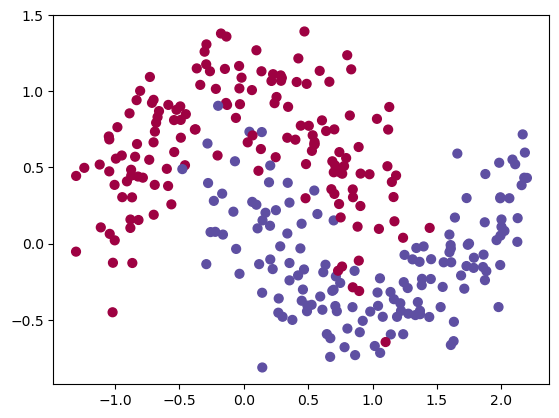

In [18]:
train_X , train_Y = load_dataset()

## simple mini batch 

******************************
0.7024046849828726
******************************
0.66810064295887
******************************
0.6352875703390978
******************************
0.600491198436302
******************************
0.5733672256957693
******************************
0.5519772083453836
******************************
0.5323695140170054
******************************
0.5140067717007158
******************************
0.4964720510901484
******************************
0.4680136839007519


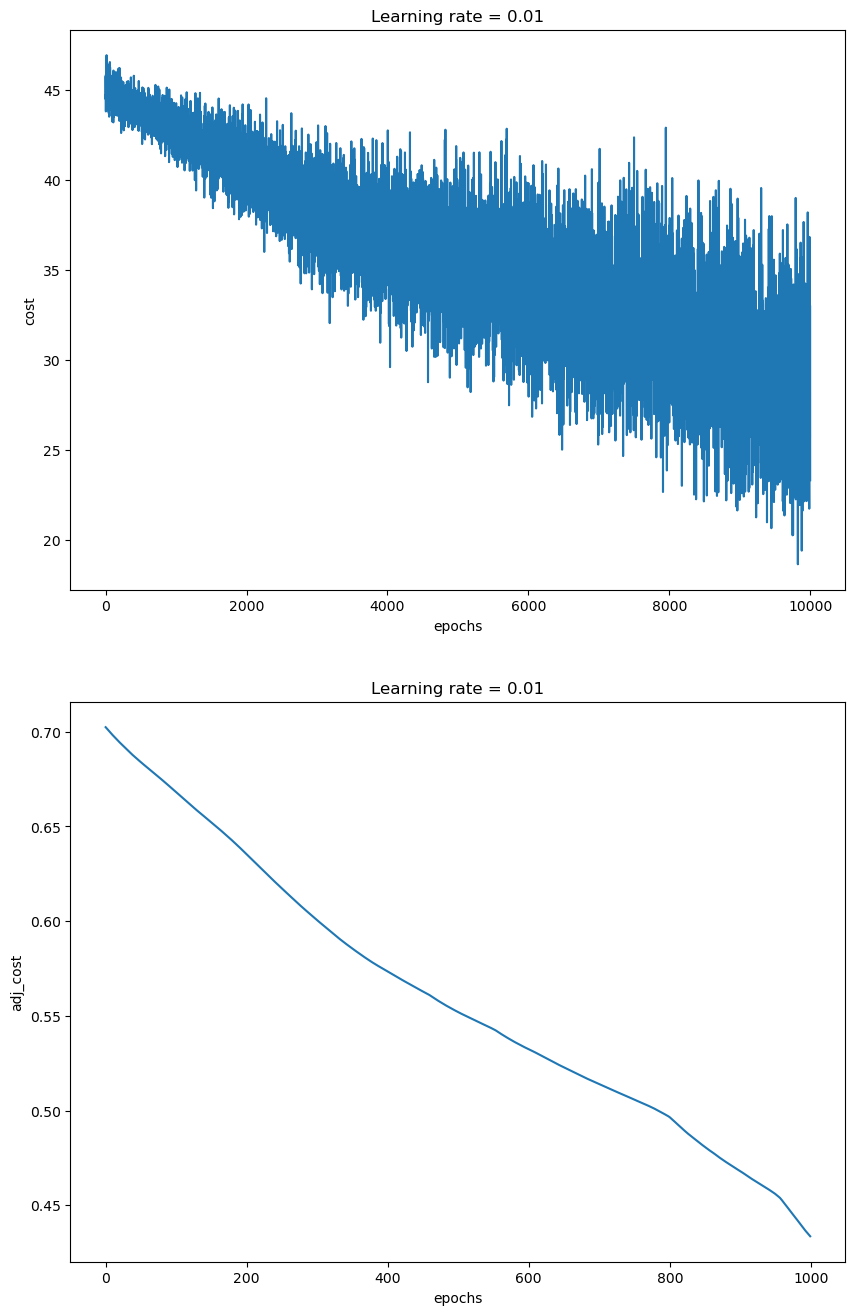

In [19]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "gd")

Accuracy: 0.7966666666666666


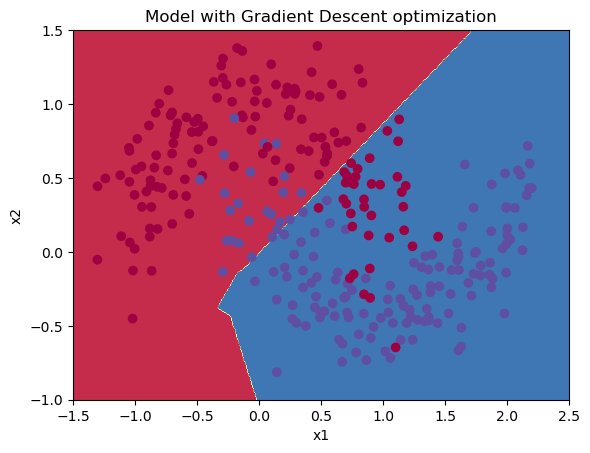

In [20]:
# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Gradient Descent optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

## momentum optimizer 

******************************
0.7024127305373173
******************************
0.6681667772046955
******************************
0.6353882166761965
******************************
0.6005907762003798
******************************
0.5734441760375261
******************************
0.5520579978012191
******************************
0.532458404673331
******************************
0.5141006579460334
******************************
0.49665208993936555
******************************
0.46815966712698187


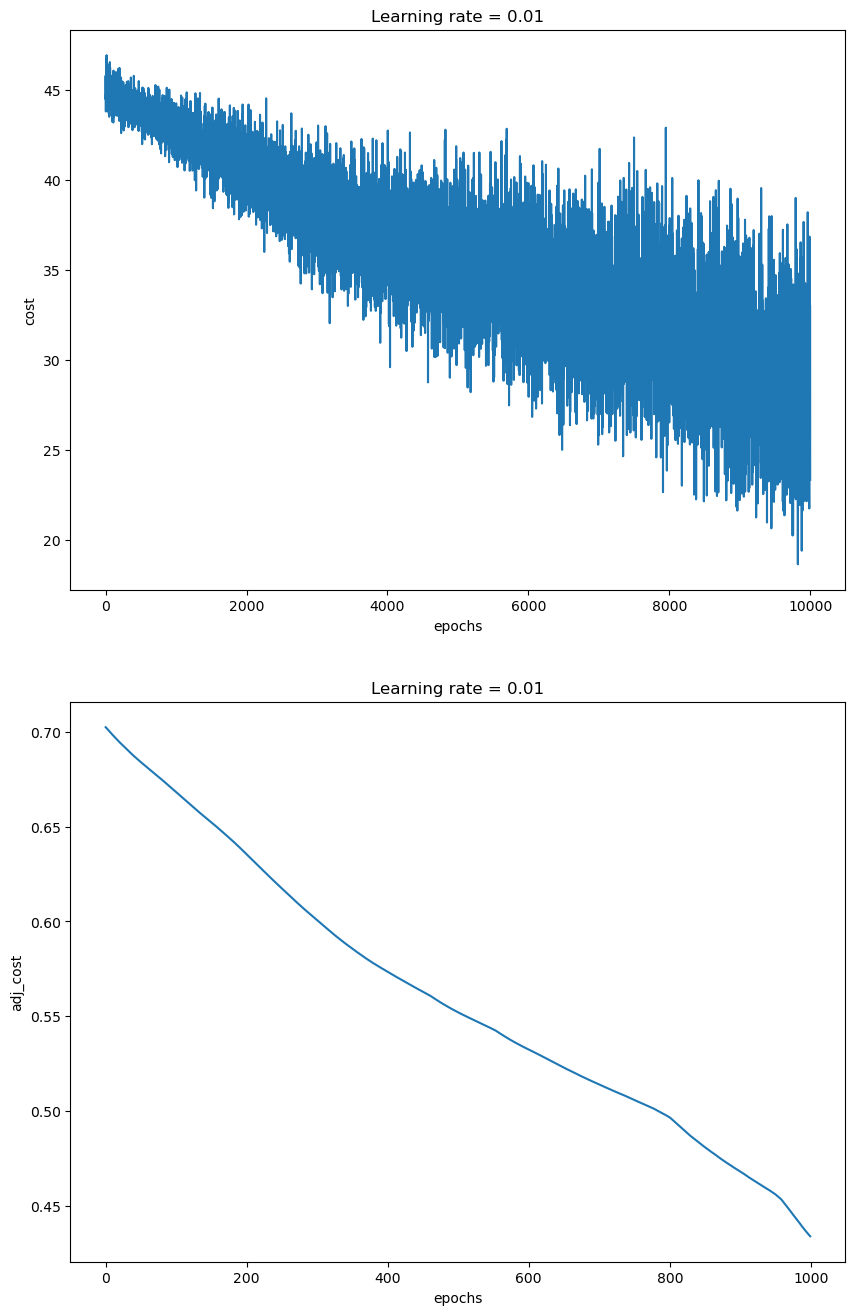

In [21]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, beta = 0.9, optimizer = "momentum")

Accuracy: 0.7966666666666666


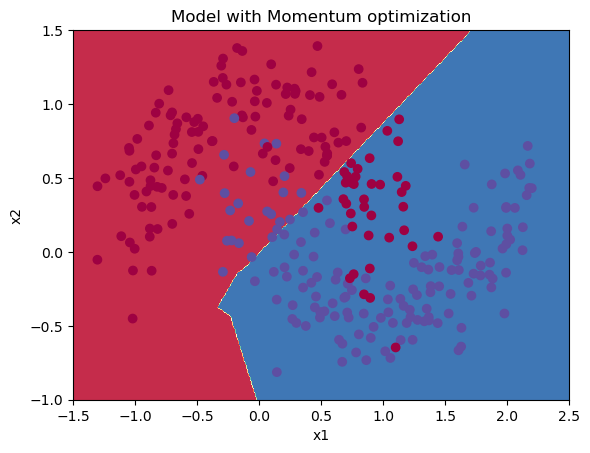

In [22]:
# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Momentum optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

## adam 

******************************
0.7021655222604548
******************************
0.1678450528258116
******************************
0.14131619792956468
******************************
0.1387878350098587
******************************
0.13606616153974382
******************************
0.134240111214826
******************************
0.13112698193050085
******************************
0.13021564068726493
******************************
0.1296233798647996
******************************
0.1291183749863679


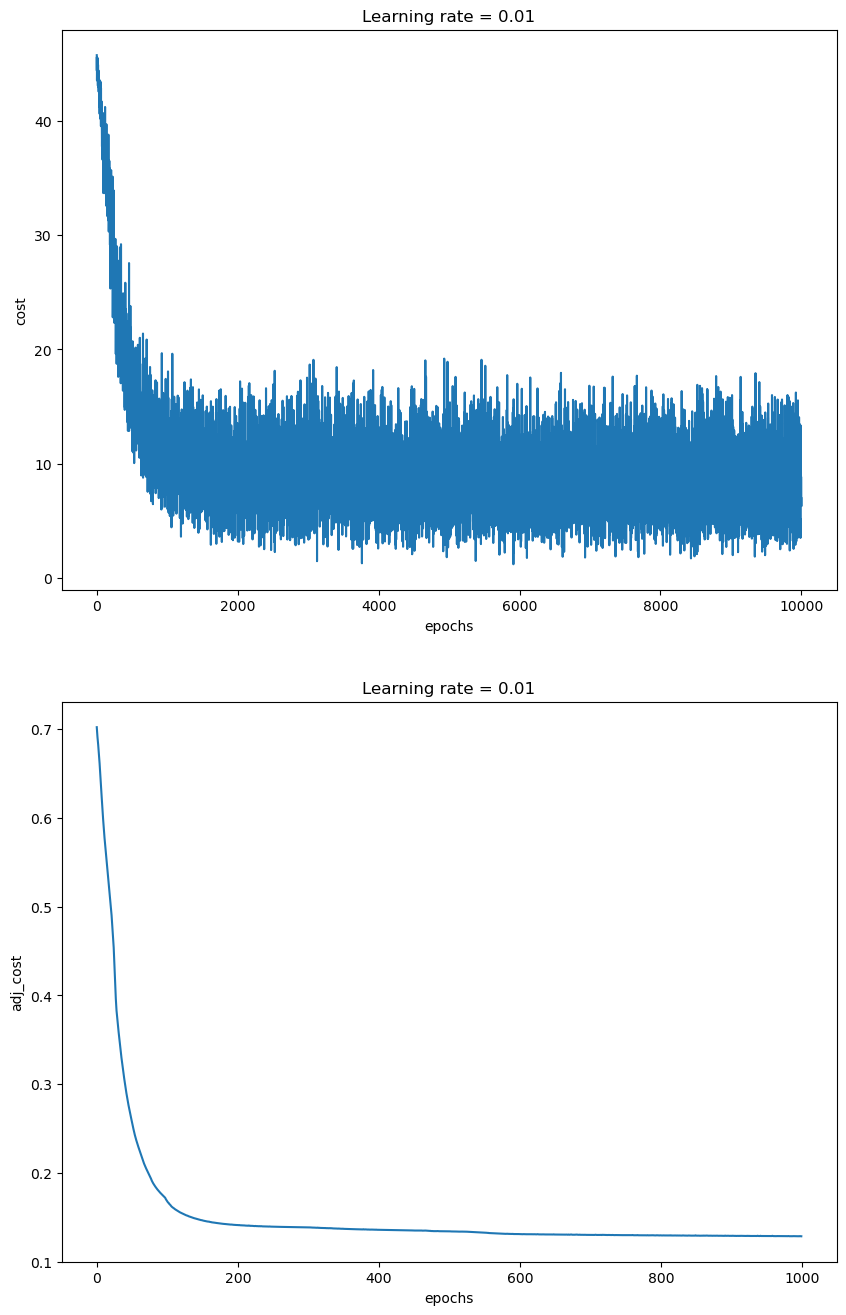

In [23]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "adam")



Accuracy: 0.94


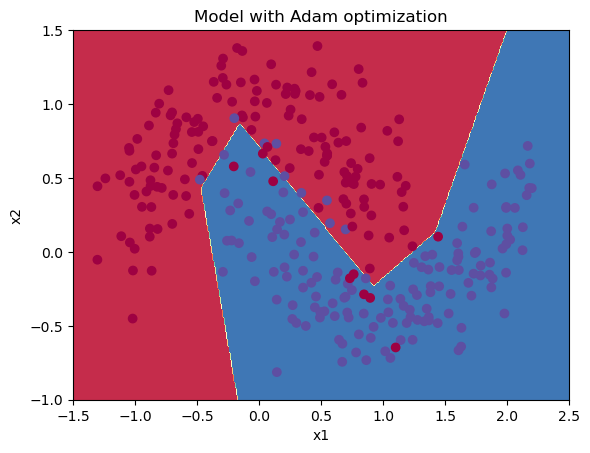

In [24]:
# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Adam optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

## rmsprop 

******************************
0.6974377259649923
******************************
0.1528802410066764
******************************
0.1405077542545961
******************************
0.13820930631711972
******************************
0.136070561026868
******************************
0.13418805388011917
******************************
0.13113182870969078
******************************
0.13064688138816802
******************************
0.1300300969571715
******************************
0.12928821405352325


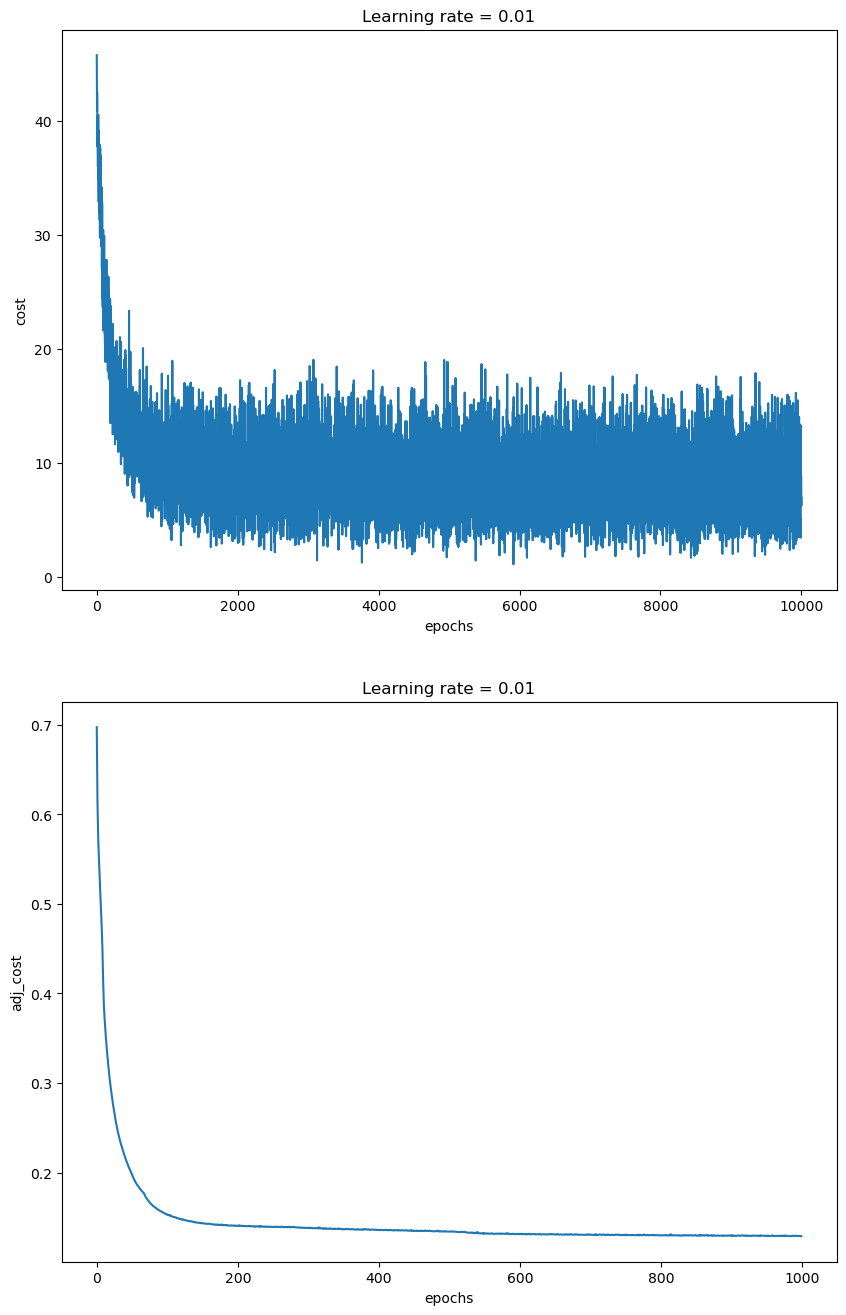

In [25]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "rmsprop")


Accuracy: 0.94


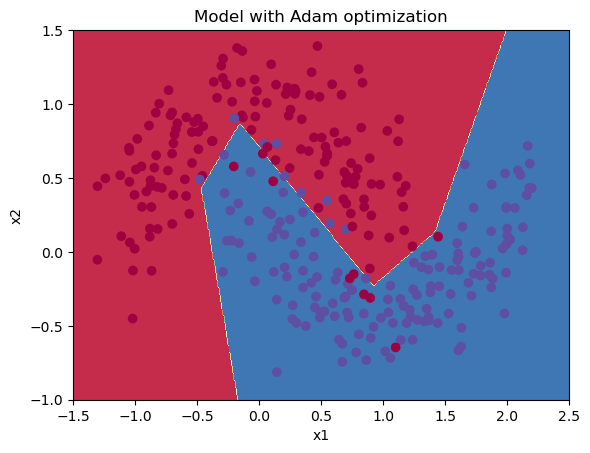

In [26]:
# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Adam optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

## batch gradient decent 

******************************
0.6974377259649923
******************************
0.1528802410066764
******************************
0.1405077542545961
******************************
0.13820930631711972
******************************
0.136070561026868
******************************
0.13418805388011917
******************************
0.13113182870969078
******************************
0.13064688138816802
******************************
0.1300300969571715
******************************
0.12928821405352325


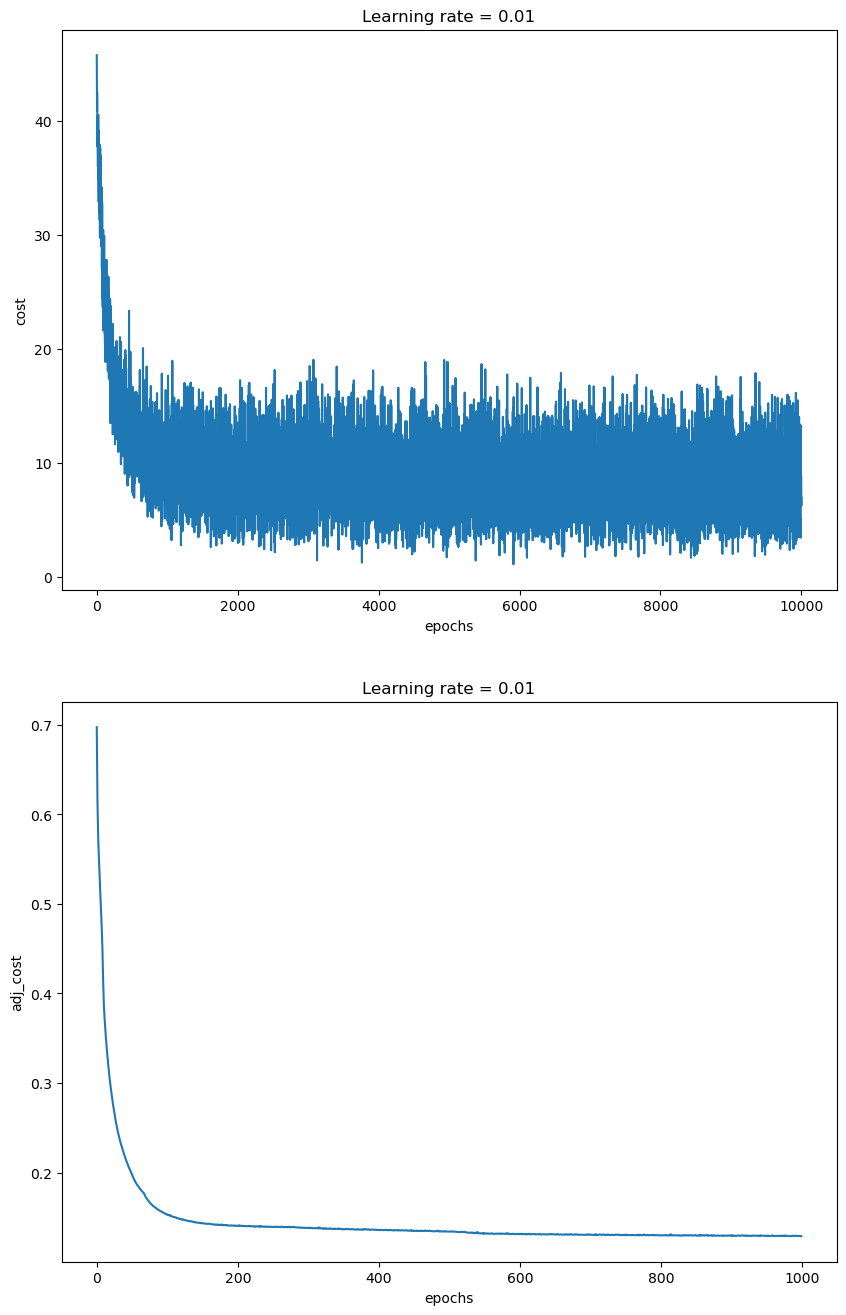

In [27]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "rmsprop",batch_size=300)


Accuracy: 0.94


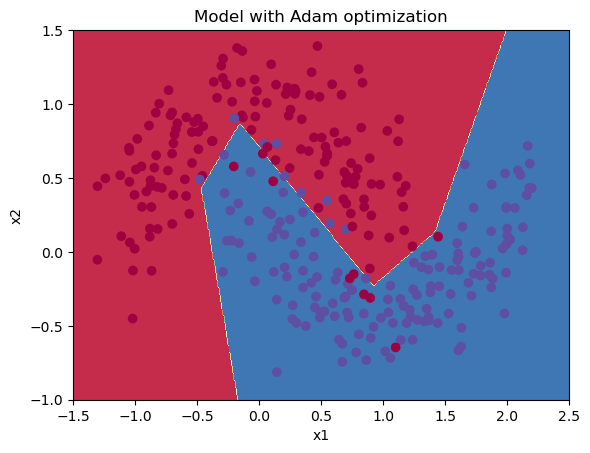

In [28]:
# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Adam optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

as you can see adam has both performance and speed 
from this special situtation of dataset and this network we can see adam give its main
power from rmsprop . i said in this special case . maybe in other case momentum part is 
powerful too . 
one of adam advantage is its doesnt needed a lot of alpha prametr tuning .
